# Fake News Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importing Dataset

In [2]:
train = pd.read_csv("train.csv")
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train.shape

(20800, 5)

In [5]:
train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

## Removing columns which are not required

In [6]:
train = train.drop(["title", "author"], axis = 1)
train

,id,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...
20795,20795,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,When the Green Bay Packers lost to the Washing...,0
20797,20797,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [7]:
train.isnull().sum()

id        0
text     39
label     0
dtype: int64

In [8]:
# drop null values (row wise)
df = train.dropna()
df

,id,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...
20795,20795,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,When the Green Bay Packers lost to the Washing...,0
20797,20797,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## Random Shuffling the dataframe

In [9]:
df = df.sample(frac = 1)

In [10]:
df.head()

,id,text,label
2969,2969,Good morning. We’re trying something new this ...,0
2358,2358,"Donnerstag, 3. November 2016 Oettinger: ""Ich h...",1
15095,15095,"Chris Bosh, one of the top players in the N. B...",0
2875,2875,"Thu, 27 Oct 2016 03:59 UTC © Robyn Beck / AFP ...",1
2789,2789,It was a slow and gentle plunge: The world’s l...,0


In [11]:
df.drop(["id"], axis = 1, inplace = True)
df.reset_index(drop=True, inplace = True)

In [12]:
df.columns

Index(['text', 'label'], dtype='object')

In [13]:
df.head()

,text,label
0,Good morning. We’re trying something new this ...,0
1,"Donnerstag, 3. November 2016 Oettinger: ""Ich h...",1
2,"Chris Bosh, one of the top players in the N. B...",0
3,"Thu, 27 Oct 2016 03:59 UTC © Robyn Beck / AFP ...",1
4,It was a slow and gentle plunge: The world’s l...,0


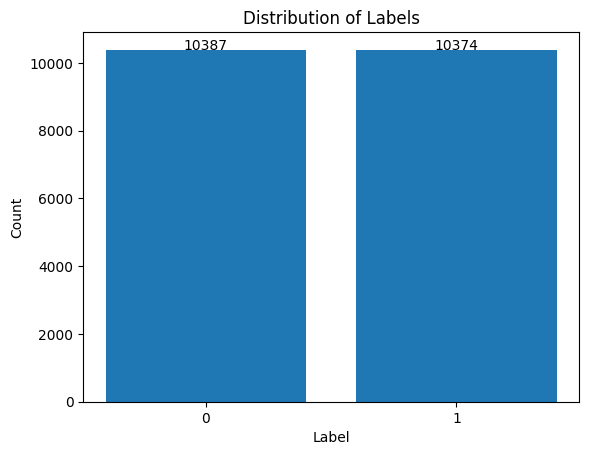

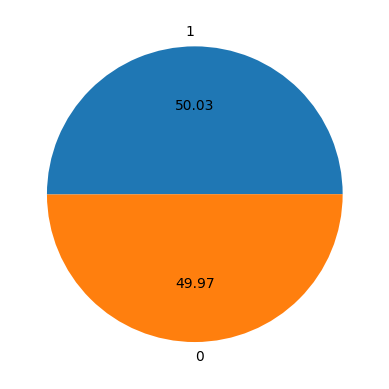

In [14]:
label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks([0, 1])

for i, count in enumerate(label_counts.values):
    plt.text(i, count + 0.1, str(count), ha = 'center')

plt.show()

import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['1','0'],autopct="%0.2f")
plt.show()

## Creating a function to process the texts

In [20]:
def wordopt(text):
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)       # remove any text within square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub('<.*?>+', '', text)        # remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub('\n', '', text)            # remove new lines
    text = re.sub('\w*\d\w*', '', text)      # remove words containing numbers
    return text

In [21]:
df['text'] = df['text'].apply(wordopt)

In [22]:
x = df["text"]
y = df["label"]
print(x)
print(y)

0        good morning we’re trying something new this w...
1        donnerstag  november  oettinger ich habe nicht...
2        chris bosh one of the top players in the n b a...
3        thu  oct   utc © robyn beck  afp despite offic...
4        it was a slow and gentle plunge the world’s la...
                               ...                        
20756    china’s communist party celebrated its  birthd...
20757     комментариев  поделились фото ар впервые эта ...
20758      a black agenda radio commentary by bruce a d...
20759    one of the three london schoolgirls who made h...
20760    by wmwadmin on november   henrymakowcom — nov ...
Name: text, Length: 20761, dtype: object
0        0
1        1
2        0
3        1
4        0
        ..
20756    0
20757    1
20758    1
20759    0
20760    1
Name: label, Length: 20761, dtype: int64


## Defining dependent and independent variables

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## Convert text to vectors

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
print(xv_train)
print("xv_test")
print(xv_test)

  (0, 25142)	0.022018179599816896
  (0, 140069)	0.022085032695940865
  (0, 22624)	0.028384272813890738
  (0, 138603)	0.020612185745484866
  (0, 54572)	0.0328612915206436
  (0, 151257)	0.030481543960351888
  (0, 2564)	0.014799290832181948
  (0, 27882)	0.04847580377578157
  (0, 116707)	0.018955065839056193
  (0, 32392)	0.03843248078205861
  (0, 102332)	0.028557972402976955
  (0, 124119)	0.021606392430770737
  (0, 34312)	0.035910915518260436
  (0, 22173)	0.019473544481608523
  (0, 4247)	0.01586053980347813
  (0, 96027)	0.017250394467241453
  (0, 105418)	0.014476523876584033
  (0, 36849)	0.03702373955329726
  (0, 103403)	0.017866343464712102
  (0, 9636)	0.021464818833167004
  (0, 137793)	0.014416023694621555
  (0, 120731)	0.05335246732716966
  (0, 55804)	0.01953800072788897
  (0, 83075)	0.02249672655826245
  (0, 129995)	0.022183105394005396
  :	:
  (16607, 92087)	0.017887683635321273
  (16607, 137329)	0.018948129516764833
  (16607, 59782)	0.04117860769974477
  (16607, 93953)	0.028033170313

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize text data and remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = [word.lower() for text in x_train for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]

# Count unique words
unique_words = set(word_tokens)
total_unique_words = len(unique_words)

print("Total different words:", total_unique_words)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [33]:
pred_lr = LR.predict(xv_test)

In [34]:
accuracy_model1 = LR.score(xv_test, y_test)
accuracy_model1

0.9470262460871659

In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1936  125]
 [  95 1997]]


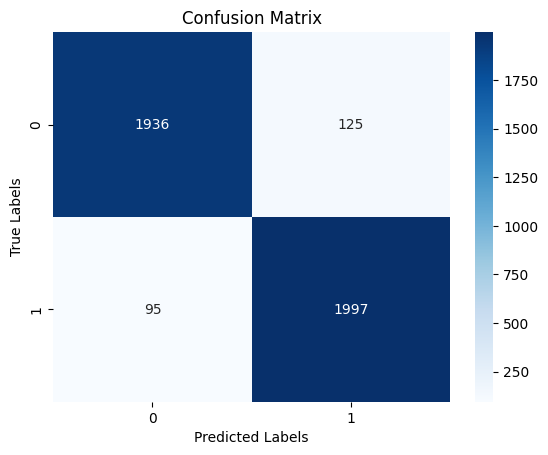

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred_lr)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2061
           1       0.94      0.95      0.95      2092

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153



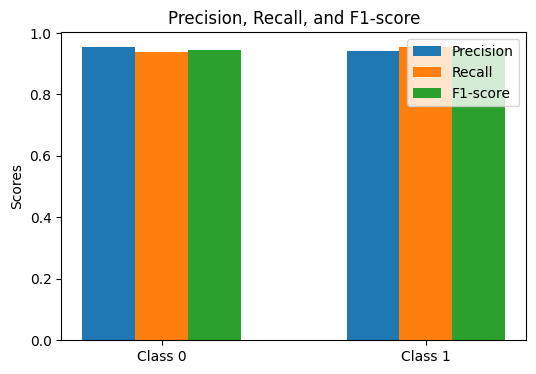

In [38]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_lr)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [40]:
pred_dt = DT.predict(xv_test)

In [41]:
accuracy_model2 = DT.score(xv_test, y_test)
accuracy_model2

0.8882735372020226

In [42]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1823  238]
 [ 226 1866]]


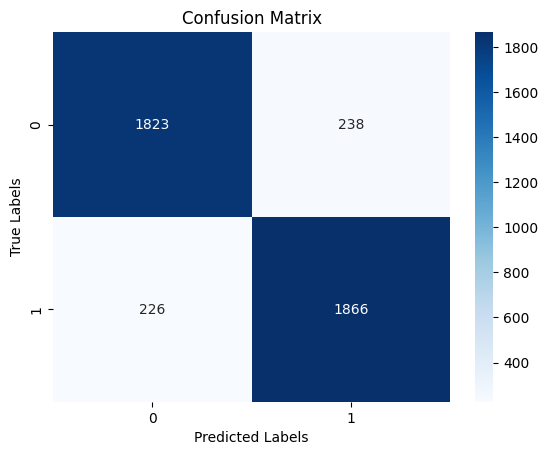

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2061
           1       0.89      0.89      0.89      2092

    accuracy                           0.89      4153
   macro avg       0.89      0.89      0.89      4153
weighted avg       0.89      0.89      0.89      4153



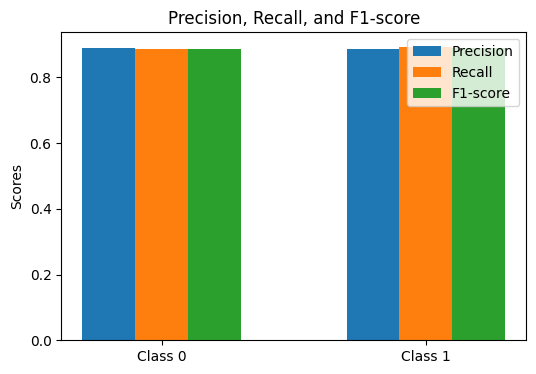

In [45]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_dt)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

In [35]:
pred_gbc = GBC.predict(xv_test)

In [36]:
accuracy_model3 = GBC.score(xv_test, y_test)
accuracy_model3

0.9354683361425475

In [38]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred_gbc)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1901  171]
 [  97 1984]]


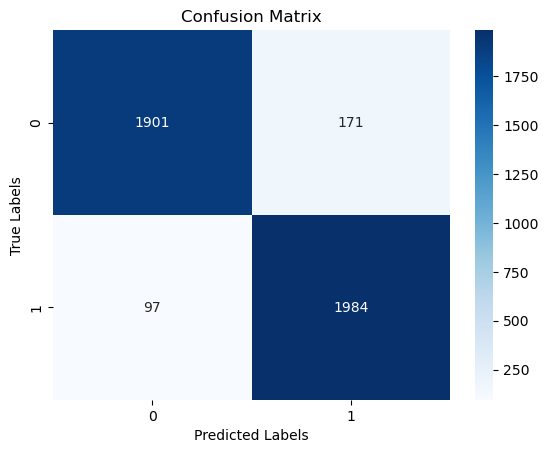

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred_gbc)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2072
           1       0.92      0.95      0.94      2081

    accuracy                           0.94      4153
   macro avg       0.94      0.94      0.94      4153
weighted avg       0.94      0.94      0.94      4153



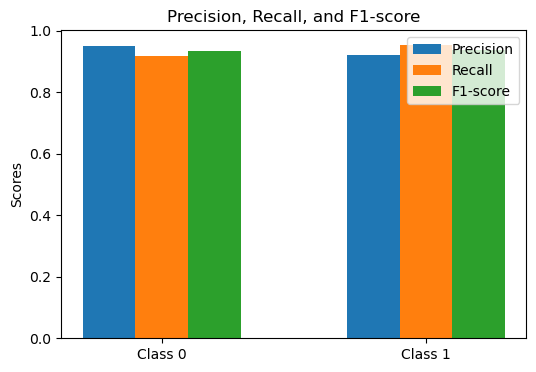

In [55]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_gbc)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
pred_rfc = RFC.predict(xv_test)

In [43]:
accuracy_model4 = RFC.score(xv_test, y_test)
accuracy_model4

0.9176498916445943

In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred_rfc)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1945  127]
 [ 215 1866]]


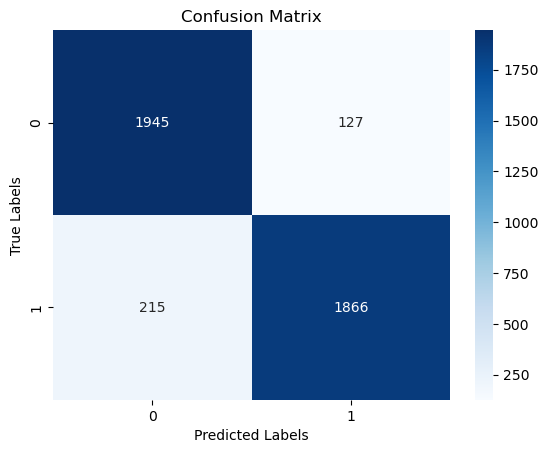

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred_rfc)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2072
           1       0.94      0.90      0.92      2081

    accuracy                           0.92      4153
   macro avg       0.92      0.92      0.92      4153
weighted avg       0.92      0.92      0.92      4153



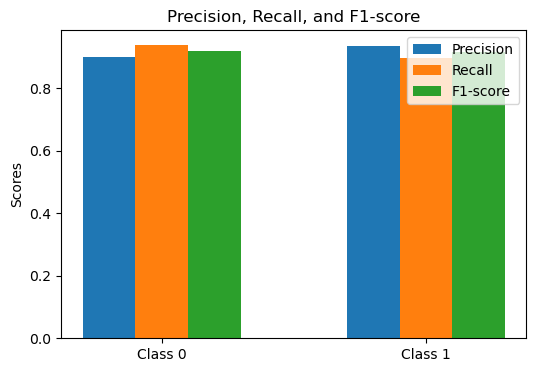

In [56]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_rfc)

# Plotting precision, recall, and F1-score
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, fscore, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

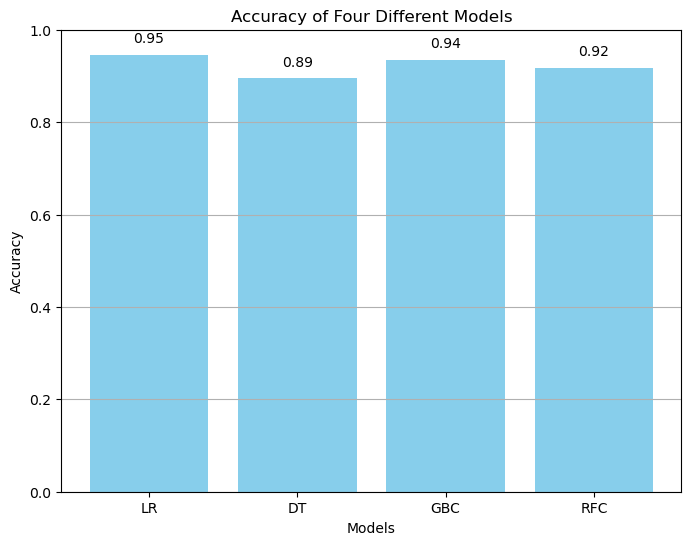

In [47]:
# Comparing Accuracy
import matplotlib.pyplot as plt

# List of model names
models = ['LR', 'DT', 'GBC', 'RFC']

# List of accuracies for each model
accuracies = [accuracy_model1, accuracy_model2, accuracy_model3, accuracy_model4]

# Plotting the accuracies
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Four Different Models')
plt.ylim(0, 1)  # Set y-axis limits to ensure accuracy values are within the range [0, 1]
plt.grid(axis='y')  # Add gridlines along the y-axis

# Annotate bars with accuracy values
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()